#### **1. Import required libraries and the dataset**

In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras import regularizers
import os
from keras.preprocessing import image
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import time


In [0]:
batch_size1 = 64
batch_size2 = 256
num_classes = 10
epochs = 20
data_augmentation = True
num_predictions = 20
num_train_samples = 50000
num_test_samples = 10000
save_dir = os.path.join(os.getcwd(), 'saved_models')
classifier_name = 'keras_cifar10_trained_model_64.h5'

In [0]:
print(save_dir)

/content/saved_models


In [0]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)
print(x_train.shape[0], 'x train samples')
print(x_test.shape[0], 'x test samples')
print(y_train.shape[0], 'y train samples')
print(y_test.shape[0], 'y test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
50000 x train samples
10000 x test samples
50000 y train samples
10000 y test samples


### **2. Visualise a sample of dataset**

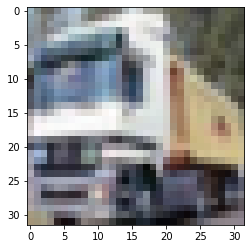

In [0]:
plt.imshow(x_train[1])

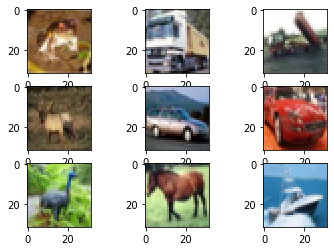

In [0]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i])
plt.show()

### **3. Data preprocessing**

In [0]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
#print(y_train)
#print(y_train.shape[0], 'y train samples')
#print(y_test.shape[0], 'y test samples')
#print((y_train[10]))


In [0]:
img = image.array_to_img(x_train[12])
print(type(img))

<class 'PIL.Image.Image'>


### **4. Sequential Model Building with Activation for each layer**

In [0]:
# Initialize CNN Models.
model_1 = Sequential() #Model 1 with 1 hidden layer of 64 units
model_2 = Sequential() #Model 2 with 3 hidden layer of 64, 64, 32 units

In [0]:
# Add layers and activations to model 1
model_1.add(Conv2D(64,(3,3),padding='valid',input_shape=x_train.shape[1:],activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model_1.add(MaxPooling2D(pool_size=(2,2)))
#model_1.add(Dropout(0.25))
model_1.add(Dropout(0.25))
model_1.add(Flatten())
model_1.add(Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model_1.add(Dropout(0.25))
#model_1.add(Dropout(0.25,kernel_regularizer=regularizers.l2(0.0001)))
model_1.add(Dense((num_classes),activation='softmax'))


In [0]:
# Add layers and activation to model 2
model_2.add(Conv2D(64,(3,3),padding='valid',input_shape=x_train.shape[1:],activation='sigmoid',kernel_regularizer=regularizers.l2(0.0001)))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))
model_2.add(Conv2D(64,(3,3),padding='valid',activation='sigmoid',kernel_regularizer=regularizers.l2(0.0001)))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))
model_2.add(Conv2D(32,(3,3),padding='valid',activation='sigmoid',kernel_regularizer=regularizers.l2(0.0001)))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))
model_2.add(Flatten())
model_2.add(Dense(512,activation='sigmoid',kernel_regularizer=regularizers.l2(0.0001)))
model_2.add(Dropout(0.25))
model_2.add(Dense((num_classes),activation='softmax'))

### **5. Compile with categorical CE loss and metric accuracy**

In [0]:
# Compile
adam = optimizers.Adam(0.001)
sgd = optimizers.SGD(0.01,momentum=0.95)
model_2.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')

### **6. Train Model with cross validation, with total time taken shown for 20 epochs**

In [0]:
# Fit
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=40)
score=[]
start = time.time()
for train, test in kfold.split(x_train,y_train):
  model_2.fit(x_train[train], y_train[train], batch_size=batch_size2, epochs=epochs, validation_data=(x_test,y_test),shuffle=True)
  score.append(model_2.evaluate(x_train[test],y_train[test],verbose=0))
end = time.time()
print('Time elapsed : ',end-start, 'seconds with average score of ', str(score.mean()))

ValueError: ignored

In [0]:
start = time.time()
estimator = KerasClassifier(build_fn=model_2, epochs=20, batch_size=265, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=40)
results = cross_val_score(estimator, x_train, y_train, cv=kfold)
end = time.time()
print("Accurcy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
print('Time elapsed ',end-start)

ValueError: ignored

In [0]:
model_2.accuracy

AttributeError: ignored

In [0]:
#1 Initialize the CNN for 64 units
classifier_64 = Sequential()

In [0]:
# Adding convolution layer
classifier_64.add(Conv2D(64,(3,3),padding='valid',input_shape=x_train.shape[1:],activation='relu'))

In [0]:
# Pooling
classifier_64.add(MaxPooling2D(pool_size=(2,2)))


In [0]:
# Dropout
classifier_64.add(Dropout(0.25))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Adding second convolution layer
classifier_64.add(Conv2D(64,(3,3),padding='valid',activation='relu'))
classifier_64.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
classifier_64.add(Dropout(0.25))


In [0]:
# Adding third convolution layer
classifier_64.add(Conv2D(32,(3,3),padding='valid',activation='relu'))
classifier_64.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
classifier_64.add(Dropout(0.25))

In [0]:
# Flattening the feature array 
classifier_64.add(Flatten())

In [0]:
# Preparing fully connected classical ANN  : Full connection
classifier_64.add(Dense(512,activation='relu'))
classifier_64.add(Dense((num_classes),activation='softmax'))
# Dropout
classifier_64.add(Dropout(0.5))

In [0]:
# Compile the CNN
classifier_64.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [0]:
# Fitting the model without data augmentation
#classifier_64.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle=True)

In [0]:
# Fitting the model with data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   shear_range=0.2,  # set range for random shear
                                   zoom_range=0.2,  # set range for random zoom
                                   horizontal_flip = True
                                  )

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow(x_train,batch_size=batch_size)
validation_generator = test_datagen.flow(x_test, batch_size = batch_size)

In [0]:
# Fit the model on the batches generated.
classifier_64.fit_generator(train_generator,
                            steps_per_epoch= num_train_samples // batch_size,
                            epochs = epochs, 
                            validation_data = validation_generator,
                            validation_steps = num_test_samples // batch_size
                            )

Epoch 1/20


ValueError: ignored

In [0]:
# Score trained model.
scores = classifier_64.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])






10000/10000 [==============================] - 3s 313us/step
Test loss: 14.136266285705567
Test accuracy: 0.1


In [0]:
Y_pred = classifier_64.predict_generator(validation_generator,num_test_samples // batch_size + 1)

In [0]:
import pandas as pd
import numpy as np
y_pred = np.argmax(Y_pred, axis = 1)

In [0]:
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes,y_pred))

Confusion Matrix


AttributeError: ignored